In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
sidewalks = gpd.read_file("data/sidewalkwidths_nyc.geojson")

In [4]:
sidewalks

,id,width,geometry
0,0,8.3,"LINESTRING (-74.24158 40.49860, -74.24195 40.4..."
1,1,8.8,"LINESTRING (-74.24195 40.49829, -74.24205 40.4..."
2,2,9.0,"LINESTRING (-74.24205 40.49823, -74.24216 40.4..."
3,3,7.2,"LINESTRING (-74.24216 40.49818, -74.24228 40.4..."
4,4,6.4,"LINESTRING (-74.24228 40.49816, -74.24239 40.4..."
...,...,...,...
464951,76932,11.4,"LINESTRING (-73.87457 40.85325, -73.87484 40.8..."
464952,76933,19.3,"LINESTRING (-73.87484 40.85341, -73.87489 40.8..."
464953,76934,4.6,"LINESTRING (-73.87435 40.85278, -73.87440 40.8..."
464954,76935,7.9,"LINESTRING (-73.87435 40.85278, -73.87432 40.8..."


<AxesSubplot:>

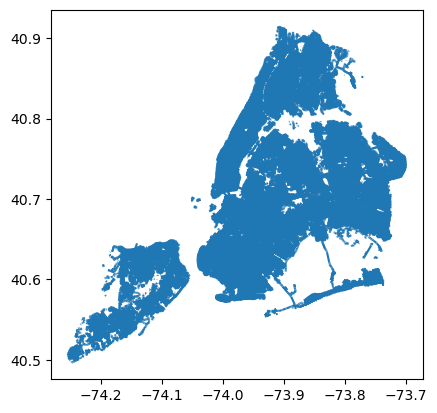

In [5]:
sidewalks.plot()

In [6]:
cd = gpd.read_file("data/Community Districts.geojson")
cd

,boro_cd,shape_area,shape_leng,geometry
0,308,45603787.0874,38232.8866494,"MULTIPOLYGON (((-73.95829 40.67983, -73.95596 ..."
1,101,41686645.7055,69054.4472325,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
2,414,195576601.166,210918.175118,"MULTIPOLYGON (((-73.90972 40.56529, -73.90973 ..."
3,204,55522139.9705,31358.4504633,"MULTIPOLYGON (((-73.90269 40.84458, -73.90271 ..."
4,501,377232535.649,153751.224394,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
...,...,...,...,...
66,409,107378543.969,50771.8331321,"MULTIPOLYGON (((-73.81710 40.70403, -73.81697 ..."
67,309,45314980.3908,29932.0840386,"MULTIPOLYGON (((-73.92872 40.66450, -73.92905 ..."
68,355,26144172.7074,23961.3953181,"MULTIPOLYGON (((-73.96257 40.67162, -73.96254 ..."
69,502,591527955.292,142728.995772,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ..."


<AxesSubplot:>

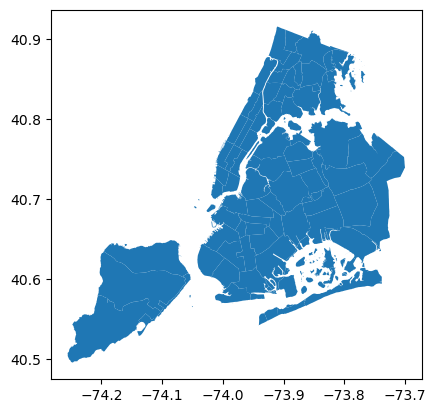

In [7]:
cd.plot()

In [8]:
sidewalks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
cd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
cd = cd.to_crs(sidewalks.crs)

In [11]:
cd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

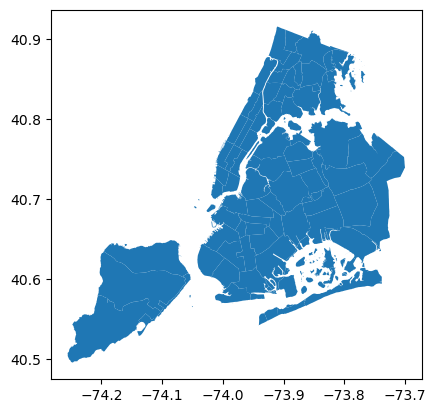

In [12]:
cd.plot()

In [14]:
##spatial join

width = gpd.sjoin(sidewalks, cd, how = "left")
width

,id,width,geometry,index_right,boro_cd,shape_area,shape_leng
0,0,8.3,"LINESTRING (-74.24158 40.49860, -74.24195 40.4...",70.0,503,600328178.2,188980.279233
1,1,8.8,"LINESTRING (-74.24195 40.49829, -74.24205 40.4...",70.0,503,600328178.2,188980.279233
2,2,9.0,"LINESTRING (-74.24205 40.49823, -74.24216 40.4...",70.0,503,600328178.2,188980.279233
3,3,7.2,"LINESTRING (-74.24216 40.49818, -74.24228 40.4...",70.0,503,600328178.2,188980.279233
4,4,6.4,"LINESTRING (-74.24228 40.49816, -74.24239 40.4...",70.0,503,600328178.2,188980.279233
...,...,...,...,...,...,...,...
464951,76932,11.4,"LINESTRING (-73.87457 40.85325, -73.87484 40.8...",28.0,227,31431192.9909,28405.5100356
464952,76933,19.3,"LINESTRING (-73.87484 40.85341, -73.87489 40.8...",28.0,227,31431192.9909,28405.5100356
464953,76934,4.6,"LINESTRING (-73.87435 40.85278, -73.87440 40.8...",28.0,227,31431192.9909,28405.5100356
464954,76935,7.9,"LINESTRING (-73.87435 40.85278, -73.87432 40.8...",28.0,227,31431192.9909,28405.5100356


In [15]:
width["id"].duplicated().value_counts()

False    275202
True     190312
Name: id, dtype: int64

<AxesSubplot:>

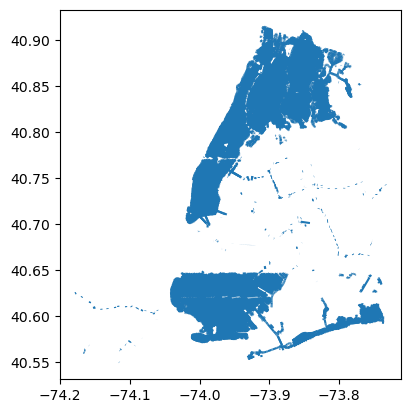

In [16]:
width[width["id"].duplicated()].plot()

<AxesSubplot:>

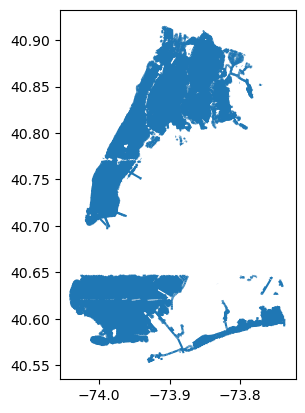

In [17]:
sidewalks[sidewalks["id"].duplicated()].plot()

In [18]:
sidewalks

,id,width,geometry
0,0,8.3,"LINESTRING (-74.24158 40.49860, -74.24195 40.4..."
1,1,8.8,"LINESTRING (-74.24195 40.49829, -74.24205 40.4..."
2,2,9.0,"LINESTRING (-74.24205 40.49823, -74.24216 40.4..."
3,3,7.2,"LINESTRING (-74.24216 40.49818, -74.24228 40.4..."
4,4,6.4,"LINESTRING (-74.24228 40.49816, -74.24239 40.4..."
...,...,...,...
464951,76932,11.4,"LINESTRING (-73.87457 40.85325, -73.87484 40.8..."
464952,76933,19.3,"LINESTRING (-73.87484 40.85341, -73.87489 40.8..."
464953,76934,4.6,"LINESTRING (-73.87435 40.85278, -73.87440 40.8..."
464954,76935,7.9,"LINESTRING (-73.87435 40.85278, -73.87432 40.8..."


In [20]:
width

,id,width,geometry,index_right,boro_cd,shape_area,shape_leng
0,0,8.3,"LINESTRING (-74.24158 40.49860, -74.24195 40.4...",70.0,503,600328178.2,188980.279233
1,1,8.8,"LINESTRING (-74.24195 40.49829, -74.24205 40.4...",70.0,503,600328178.2,188980.279233
2,2,9.0,"LINESTRING (-74.24205 40.49823, -74.24216 40.4...",70.0,503,600328178.2,188980.279233
3,3,7.2,"LINESTRING (-74.24216 40.49818, -74.24228 40.4...",70.0,503,600328178.2,188980.279233
4,4,6.4,"LINESTRING (-74.24228 40.49816, -74.24239 40.4...",70.0,503,600328178.2,188980.279233
...,...,...,...,...,...,...,...
464951,76932,11.4,"LINESTRING (-73.87457 40.85325, -73.87484 40.8...",28.0,227,31431192.9909,28405.5100356
464952,76933,19.3,"LINESTRING (-73.87484 40.85341, -73.87489 40.8...",28.0,227,31431192.9909,28405.5100356
464953,76934,4.6,"LINESTRING (-73.87435 40.85278, -73.87440 40.8...",28.0,227,31431192.9909,28405.5100356
464954,76935,7.9,"LINESTRING (-73.87435 40.85278, -73.87432 40.8...",28.0,227,31431192.9909,28405.5100356


In [25]:
width.groupby(by = "boro_cd")["width"].mean().sort_values().to_clipboard()

In [ ]:
width.plot(by = "width")

In [ ]:
##width.groupby(by = "ZIPCODE")["width"].mean()

In [ ]:
##width.groupby(by = "PO_NAME")["width"].mean().sort_values()